In [2]:
import pandas as pd

## Load Dataset

In [3]:
book = pd.read_csv("C:/Users/GC/Desktop/2021/연구/장기베스트셀러/데이터/Bestseller_Nonfiction.csv", encoding="cp949")

print(book.shape)
book.head()

(262, 17)


,BestsellerNonfic,Genre,GenreBin,Title,Author,Published Year,Publisher,Page,Price,authorgender(male0fe1team2),isFirstBestSeller,Duration,변경전Duration,변경후Duration3(0=S1=L2=etc),Impact,year_rank,isGlobal50 of first year(False=0True=1)
0,2020,Religion&Spirituality,0,The Four Agreements: A Practical Guide to…,Don Miguel Ruiz,1997,Amber-Allen Publishing Incorporated,160,6.48,0,0,9,1,1,2.255000e+05,2019_20,0
1,2020,Religion&Spirituality,0,The 5 Love Languages: The Secret to Love that…,Gary Chapman,2015,Northfield Publishing,208,17.99,0,0,10,1,1,1.558974e+05,2019_10,0
2,2020,Reference,0,Publication Manual of the American…,American Psychological Association,2019,American Psychological Association,428,26.70,2,0,10,1,1,2.300000e+08,2019_66,0
3,2020,Religion&Spirituality,0,The Alchemist 25th Anniversary: A Fable About…,Paulo Coelho,2003,HarperOne,208,25.99,0,0,6,1,1,9.876020e+06,2019_65,1
4,2020,Religion&Spirituality,0,The Gifts of Imperfection: Let Go of Who You…,Bren? Brown,2012,Brilliance Audio,160,16.95,1,1,8,1,1,1.087900e+05,2019_60,0


## Preprocessing

### column filter

사용할 columns을 선정

In [4]:
book.columns

Index(['BestsellerNonfic', 'Genre', 'GenreBin', 'Title', 'Author',
       'Published Year', 'Publisher', 'Page', 'Price',
       'authorgender(male0fe1team2)', 'isFirstBestSeller', 'Duration',
       '변경전Duration', '변경후Duration3(0=S1=L2=etc)', 'Impact', 'year_rank',
       'isGlobal50 of first year(False=0True=1)'],
      dtype='object')

In [6]:
col_names = ['Published Year', 'Page', 'Price',
       'authorgender(male0fe1team2)', 'isFirstBestSeller', '변경후Duration3(0=S1=L2=etc)', 'Impact', 'isGlobal50 of first year(False=0True=1)']

In [7]:
book = book[col_names]

print(book.shape)
book.head()

(262, 8)


,Published Year,Page,Price,authorgender(male0fe1team2),isFirstBestSeller,변경후Duration3(0=S1=L2=etc),Impact,isGlobal50 of first year(False=0True=1)
0,1997,160,6.48,0,0,1,2.255000e+05,0
1,2015,208,17.99,0,0,1,1.558974e+05,0
2,2019,428,26.70,2,0,1,2.300000e+08,0
3,2003,208,25.99,0,0,1,9.876020e+06,1
4,2012,160,16.95,1,1,1,1.087900e+05,0


### Encode Sex

데이터 값을 수치적으로 변경해줘야 분석에 사용 가능

In [6]:
# 성별(Sex) 값이 Male인 열을 0, Female인 열을 1로 수정
#titanic.loc[titanic["Sex"] == "Male", "Sex"] = 0
#titanic.loc[titanic["Sex"] == "Female", "Sex"] = 1

#print(titanic.shape)
#titanic.head()

(1309, 8)


,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Port of Embarkation,Survived
0,First,1,29.0,0.0,0.0,211.3,Southampton,Yes
1,First,0,0.9,1.0,2.0,151.6,Southampton,Yes
2,First,1,2.0,1.0,2.0,151.6,Southampton,No
3,First,0,30.0,1.0,2.0,151.6,Southampton,No
4,First,1,25.0,1.0,2.0,151.6,Southampton,No


### Encode Passenger Class

In [7]:
# 등급(Passenger Class) 값이 First, Second, Third인 열을 각각 1, 2, 3으로 수정
#titanic.loc[titanic["Passenger Class"] == "First", "Passenger Class"] = 1
#titanic.loc[titanic["Passenger Class"] == "Second", "Passenger Class"] = 2
#titanic.loc[titanic["Passenger Class"] == "Third", "Passenger Class"] = 3

#print(titanic.shape)
#titanic.head()

(1309, 8)


,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Port of Embarkation,Survived
0,1,1,29.0,0.0,0.0,211.3,Southampton,Yes
1,1,0,0.9,1.0,2.0,151.6,Southampton,Yes
2,1,1,2.0,1.0,2.0,151.6,Southampton,No
3,1,0,30.0,1.0,2.0,151.6,Southampton,No
4,1,1,25.0,1.0,2.0,151.6,Southampton,No


# Fill in missing values

In [17]:
titanic = pd.concat([titanic, pd.get_dummies(titanic['Port of Embarkation'])], axis=1)

print(titanic.shape)
titanic.head()

(1307, 11)


,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Port of Embarkation,Survived,Cherbourg,Queenstown,Southampton
0,1,1,29.0,0.0,0.0,211.3,Southampton,Yes,0,0,1
1,1,0,0.9,1.0,2.0,151.6,Southampton,Yes,0,0,1
2,1,1,2.0,1.0,2.0,151.6,Southampton,No,0,0,1
3,1,0,30.0,1.0,2.0,151.6,Southampton,No,0,0,1
4,1,1,25.0,1.0,2.0,151.6,Southampton,No,0,0,1


### Encode Survived

In [18]:
#titanic['Survived'] = pd.Categorical(titanic['Survived'], categories=['No', 'Yes'])

In [19]:
#titanic['Survived']  = titanic['Survived'].cat.codes
#titanic['Survived']

0       1
1       1
2       0
3       0
4       0
       ..
1302    0
1303    0
1304    0
1305    0
1306    0
Name: Survived, Length: 1307, dtype: int8

## Partitioning

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
book.columns

Index(['Published Year', 'Page', 'Price', 'authorgender(male0fe1team2)',
       'isFirstBestSeller', '변경후Duration3(0=S1=L2=etc)', 'Impact',
       'isGlobal50 of first year(False=0True=1)'],
      dtype='object')

In [10]:
cols_for_train = ['Published Year', 'Page', 'Price',
       'authorgender(male0fe1team2)', 'isFirstBestSeller', 'Impact',
       'isGlobal50 of first year(False=0True=1)']


X = book[cols_for_train]
y = book['변경후Duration3(0=S1=L2=etc)']

In [11]:
import numpy as np
book[:] = np.nan_to_num(book)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

In [79]:
print(X_train.shape)
X_train.head()

(209, 7)


,Published Year,Page,Price,authorgender(male0fe1team2),isFirstBestSeller,Impact,isGlobal50 of first year(False=0True=1)
65,2015.0,336.0,30.00,0.0,0.0,1.039511e+05,1.0
53,2020.0,384.0,19.99,0.0,1.0,1.080000e+07,1.0
251,2014.0,253.0,16.99,0.0,1.0,4.304893e+04,1.0
82,2011.0,272.0,16.99,1.0,1.0,7.020000e+04,1.0
30,2020.0,976.0,38.95,2.0,1.0,4.522475e+08,1.0


In [80]:
print(X_test.shape)
X_test.head()

(53, 7)


,Published Year,Page,Price,authorgender(male0fe1team2),isFirstBestSeller,Impact,isGlobal50 of first year(False=0True=1)
242,2014.0,404.0,9.99,0.0,1.0,2.435730e+07,1.0
27,2020.0,448.0,35.00,0.0,1.0,4.482050e+04,1.0
80,2013.0,1016.0,22.00,0.0,0.0,8.680649e+03,1.0
85,2011.0,356.0,5.99,2.0,1.0,6.430766e+04,1.0
227,2019.0,448.0,18.00,0.0,0.0,1.364000e+05,1.0


In [81]:
print(y_train.shape)
y_train.head()

(209,)


65     0
53     0
251    0
82     0
30     0
Name: 변경후Duration3(0=S1=L2=etc), dtype: int64

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
X_train[:] = np.nan_to_num(X_train)
y_train[:] = np.nan_to_num(y_train)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [84]:
print(model.score(X_train, y_train))

0.6650717703349283


In [85]:
X_test[:] = np.nan_to_num(X_test)

predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:93]

(53,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [86]:
print(model.score(X_test, y_test))

0.6415094339622641


In [87]:
print(model.coef_)

#'Published Year', 'Page', 'Price','authorgender(male0fe1team2)', 'isFirstBestSeller', 'Impact', 'isGlobal50 of first year(False=0True=1)']


[[-0.36720179 -0.07694227  0.07732582  0.05972657 -0.02045221  0.04931565
  -0.31060976]]


In [88]:
from sklearn.metrics import confusion_matrix

conf_matrix = pd.DataFrame(confusion_matrix(y_test, predictions), 
                          columns=['pred_No', 'pred_yes'],
                          index=['true_No', 'true_yes'])

conf_matrix

,pred_No,pred_yes
true_No,28,5
true_yes,14,6


### ROC curve

In [89]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

In [90]:
model.predict_proba(X_test)

array([[0.70373469, 0.29626531],
       [0.76003461, 0.23996539],
       [0.72246321, 0.27753679],
       [0.63330019, 0.36669981],
       [0.75708104, 0.24291896],
       [0.67667955, 0.32332045],
       [0.54856368, 0.45143632],
       [0.73600711, 0.26399289],
       [0.76184864, 0.23815136],
       [0.69553097, 0.30446903],
       [0.729428  , 0.270572  ],
       [0.73664919, 0.26335081],
       [0.47281601, 0.52718399],
       [0.54002312, 0.45997688],
       [0.6609578 , 0.3390422 ],
       [0.54749895, 0.45250105],
       [0.52527622, 0.47472378],
       [0.47665195, 0.52334805],
       [0.73415884, 0.26584116],
       [0.56870041, 0.43129959],
       [0.64705956, 0.35294044],
       [0.64265418, 0.35734582],
       [0.75127967, 0.24872033],
       [0.71848063, 0.28151937],
       [0.48207925, 0.51792075],
       [0.62469253, 0.37530747],
       [0.70235266, 0.29764734],
       [0.68415959, 0.31584041],
       [0.48491616, 0.51508384],
       [0.4997444 , 0.5002556 ],
       [0.

ROC AUC: 0.573


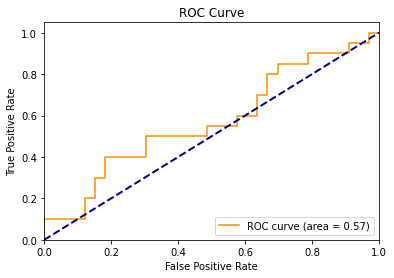

In [91]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [92]:
fpr

array([0.        , 0.        , 0.        , 0.12121212, 0.12121212,
       0.15151515, 0.15151515, 0.18181818, 0.18181818, 0.3030303 ,
       0.3030303 , 0.48484848, 0.48484848, 0.57575758, 0.57575758,
       0.63636364, 0.63636364, 0.66666667, 0.66666667, 0.6969697 ,
       0.6969697 , 0.78787879, 0.78787879, 0.90909091, 0.90909091,
       0.96969697, 0.96969697, 1.        ])

In [93]:
tpr

array([0.  , 0.05, 0.1 , 0.1 , 0.2 , 0.2 , 0.3 , 0.3 , 0.4 , 0.4 , 0.5 ,
       0.5 , 0.55, 0.55, 0.6 , 0.6 , 0.7 , 0.7 , 0.8 , 0.8 , 0.85, 0.85,
       0.9 , 0.9 , 0.95, 0.95, 1.  , 1.  ])

### Accuracy

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [95]:
print(f'Accuracy: {accuracy_score(y_test, predictions):0.3f}')
print(f'Precision: {precision_score(y_test, predictions):0.3f}')
print(f'Recall: {recall_score(y_test, predictions):0.3f}')
print(f'f1: {f1_score(y_test, predictions):0.3f}')

Accuracy: 0.642
Precision: 0.545
Recall: 0.300
f1: 0.387


In [96]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
import numpy

X[:] = np.nan_to_num(X)
y[:] = np.nan_to_num(y)

kfold = StratifiedKFold(n_splits=5)
cross_val_score(model, X, y, scoring="accuracy", cv=kfold)

<ipython-input-96-672599b064c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[:] = np.nan_to_num(X)
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:2945: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(key, value)
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:2930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._setitem_slice

array([0.62264151, 0.62264151, 0.61538462, 0.61538462, 0.61538462])

In [97]:
cross_val_score(model, X, y, scoring="precision", cv=kfold)

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pr

array([0., 0., 0., 0., 0.])

In [98]:
cross_val_score(model, X, y, scoring="recall", cv=kfold)

array([0., 0., 0., 0., 0.])

In [99]:
cross_val_score(model, X, y, scoring="f1", cv=kfold)

array([0., 0., 0., 0., 0.])